In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

import pickle

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

In [5]:
df = pd.concat([
    pd.read_csv('customer_churn_testing.csv'),
    pd.read_csv('customer_churn_training.csv')
], axis=0)
df.reset_index(drop=True, inplace=True)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.00,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.00,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.00,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.00,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.00,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505202,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
505203,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
505204,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
505205,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [6]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [7]:
df.describe(include=[object])

,Gender,Subscription Type,Contract Length
count,505206,505206,505206
unique,2,3,3
top,Male,Standard,Annual
freq,280273,170630,198608


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [9]:
df.drop(columns='CustomerID', inplace=True) # removing unnecessary colum

df.columns = [col.lower().replace(' ', '_') for col in df.columns] # renaming the column names 

In [10]:
df.shape

(505207, 11)

In [11]:
df.isnull().sum()

age                  1
gender               1
tenure               1
usage_frequency      1
support_calls        1
payment_delay        1
subscription_type    1
contract_length      1
total_spend          1
last_interaction     1
churn                1
dtype: int64

In [12]:
df[df.isna().any(axis=1)]

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
263669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.dropna(inplace=True) # Removing the single missing value row

In [14]:
df.shape

(505206, 11)

In [15]:
descrete_col = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'last_interaction', 'churn']
for col in descrete_col:
    df[col] = df[col].astype(int)
df

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,22,Female,25,14,4,27,Basic,Monthly,598.00,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584.00,20,0
2,47,Male,27,10,2,29,Premium,Annual,757.00,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232.00,18,0
4,53,Female,58,24,9,2,Standard,Annual,533.00,18,0
...,...,...,...,...,...,...,...,...,...,...,...
505202,42,Male,54,15,1,3,Premium,Annual,716.38,8,0
505203,25,Female,8,13,1,20,Premium,Annual,745.38,2,0
505204,26,Male,35,27,1,5,Standard,Quarterly,977.31,9,0
505205,28,Male,55,14,2,0,Standard,Quarterly,602.55,2,0


In [16]:
# Creating custom functions to visualize features

def make_histogram(df, target_feature, bins = 10, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    plt.hist(df[target_feature], bins=bins)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.ylabel('Count')
    plt.xlabel(target_feature)
    plt.title(f"Distribution of {target_feature.lower()}{additional}:\n")
    plt.grid()
    plt.show()
    print(f"Distribution of {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n{df[target_feature].skew():.3f} Skewness\n")

def make_piechart(df, target_feature, additional=''):
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    
    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f"Distribution of Cutomer's {target_feature}:")
    plt.show()
    print_str = f"Distribution of cutomer's {target_feature.lower()}{additional}:"
    for k, v in zip(keys, data):
        print_str += f"\n{v} {k}"
    print(print_str)

def make_barplot(df, target_feature, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    plt.bar(keys, data)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.xlabel(f'{target_feature.capitalize()}{additional}')
    plt.ylabel('Frequency')
    plt.title(f"Distribution of cutomer's {target_feature.lower()}{additional}\n")
    plt.grid(axis='y')
    plt.show()
    print(f"Distribution of cutomer's {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n\n{df[target_feature].skew():.3f} Skewness\n")
    
def make_boxplot(df, feature):
    plt.figure(figsize=(10,5))
    sns.boxplot(df, x=feature)
    plt.title(f"Boxplot of {feature}\n")
    plt.xlabel(feature)
    plt.ylabel("Values")
    plt.show()

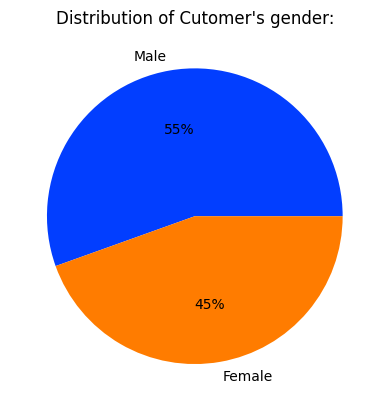

Distribution of cutomer's gender:
280273 Male
224933 Female


In [17]:
make_piechart(df, 'gender')

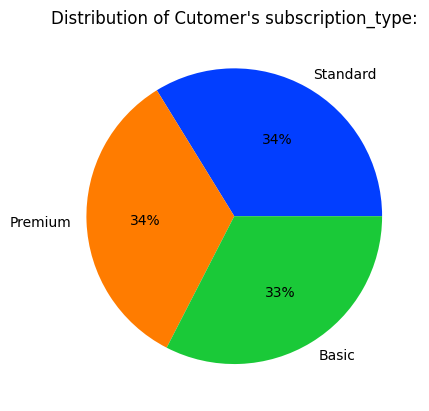

Distribution of cutomer's subscription_type:
170630 Standard
170099 Premium
164477 Basic


In [18]:
make_piechart(df, 'subscription_type')

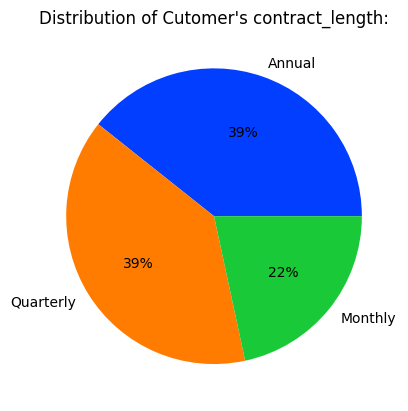

Distribution of cutomer's contract_length:
198608 Annual
197364 Quarterly
109234 Monthly


In [19]:
make_piechart(df, 'contract_length')

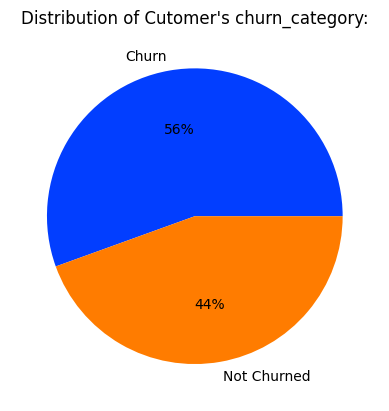

Distribution of cutomer's churn_category:
280492 Churn
224714 Not Churned


In [20]:
filtered = df.copy()
filtered['churn_category'] = ['Churn' if x == 1.0 else 'Not Churned' for x in df['churn']]
make_piechart(filtered, 'churn_category')

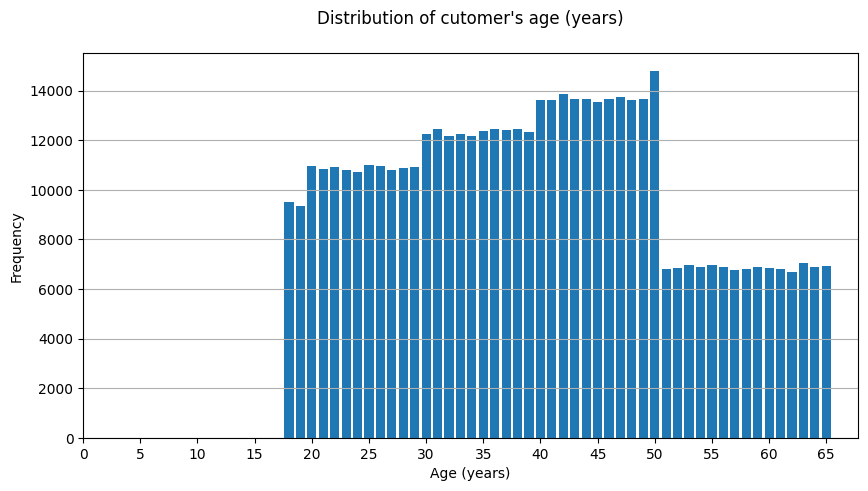

Distribution of cutomer's age (years): 39.70 ± 40.00 years
Median: 40.00 years
Minimum: 18 years
Maximum: 65 years

0.144 Skewness



In [21]:
make_barplot(df, 'age', custom_ticks=np.arange(0, 66, 5), additional=' (years)', unit='years')

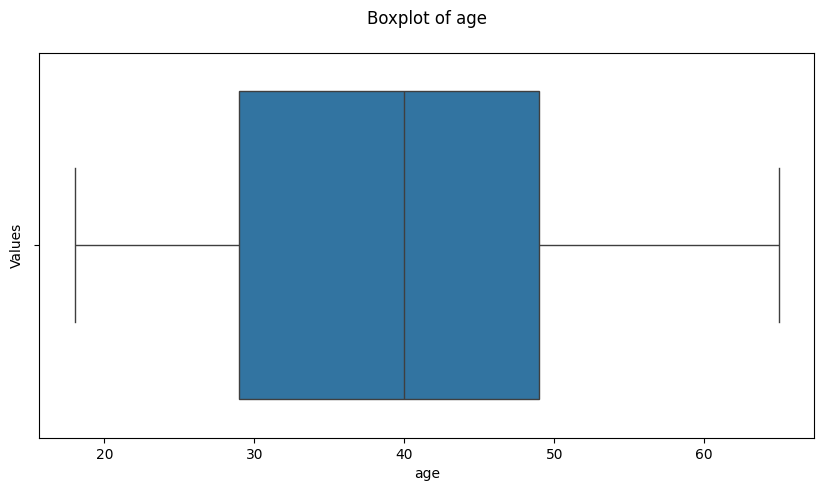

In [22]:
make_boxplot(df, 'age')

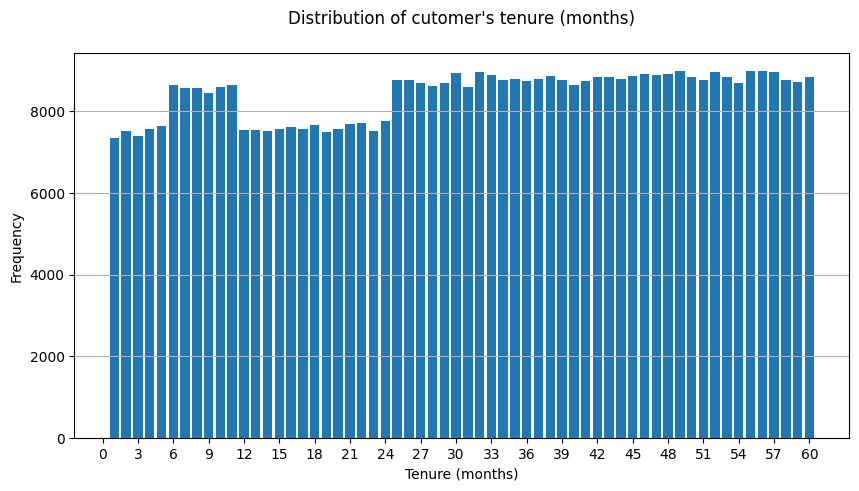

Distribution of cutomer's tenure (months): 31.35 ± 32.00 months
Median: 32.00 months
Minimum: 1 months
Maximum: 60 months

-0.070 Skewness



In [23]:
make_barplot(df, 'tenure', custom_ticks=np.arange(0, 61, 3), additional=' (months)', unit='months')

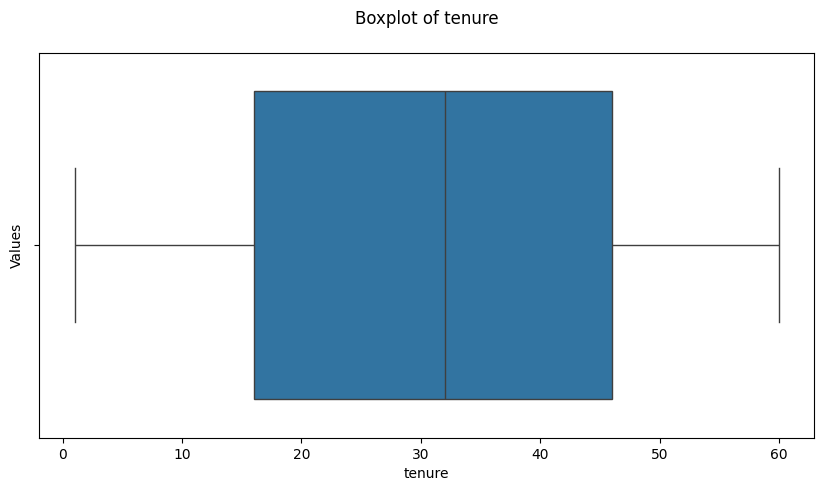

In [24]:
make_boxplot(df, 'tenure')

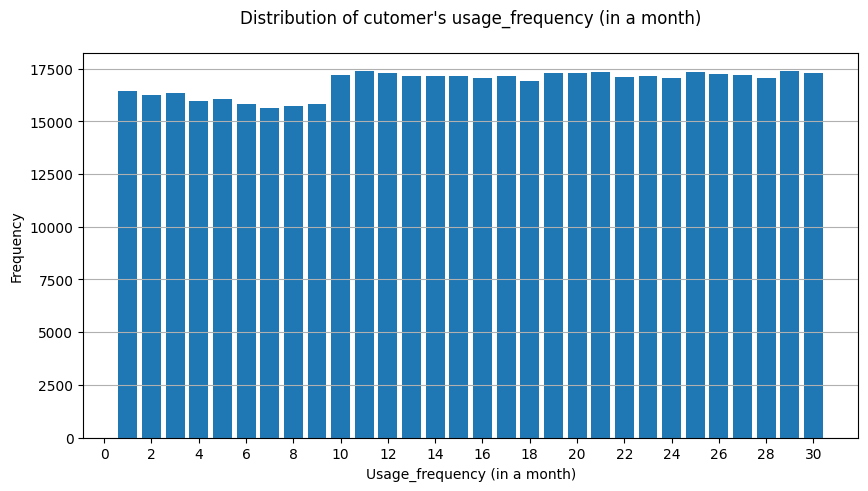

Distribution of cutomer's usage_frequency (in a month): 15.71 ± 16.00 times
Median: 16.00 times
Minimum: 1 times
Maximum: 30 times

-0.034 Skewness



In [25]:
make_barplot(df, 'usage_frequency', custom_ticks=np.arange(0, 31, 2), unit='times', additional=' (in a month)')

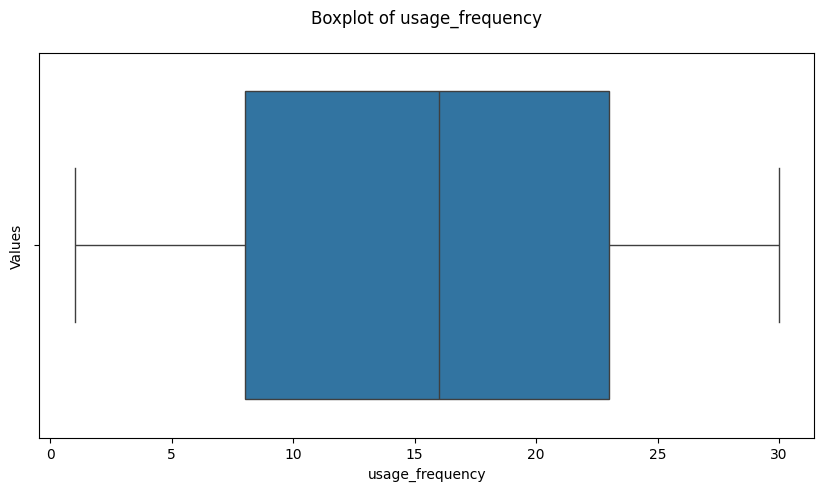

In [26]:
make_boxplot(df, 'usage_frequency')

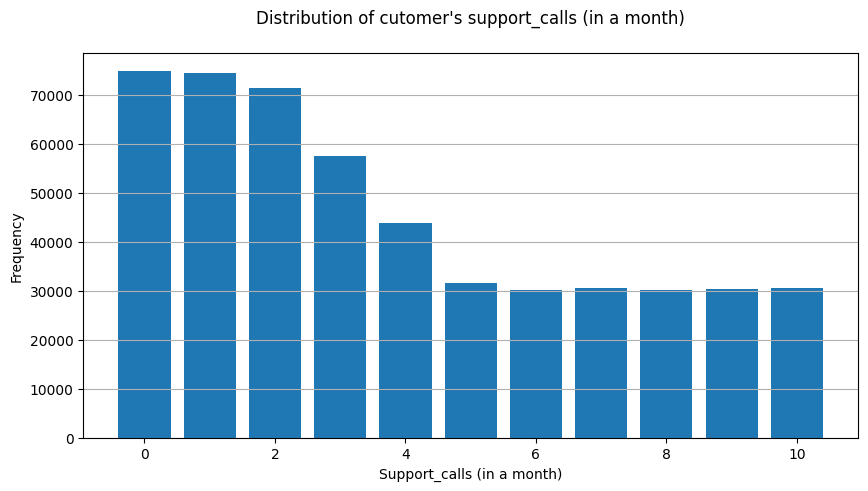

Distribution of cutomer's support_calls (in a month): 3.83 ± 3.00 calls
Median: 3.00 calls
Minimum: 0 calls
Maximum: 10 calls

0.544 Skewness



In [27]:
make_barplot(df, 'support_calls', unit='calls', additional=' (in a month)')

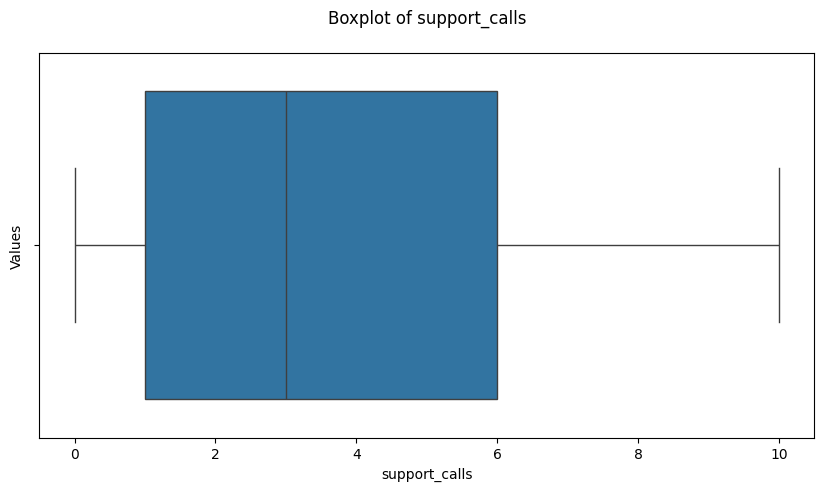

In [28]:
make_boxplot(df, 'support_calls')

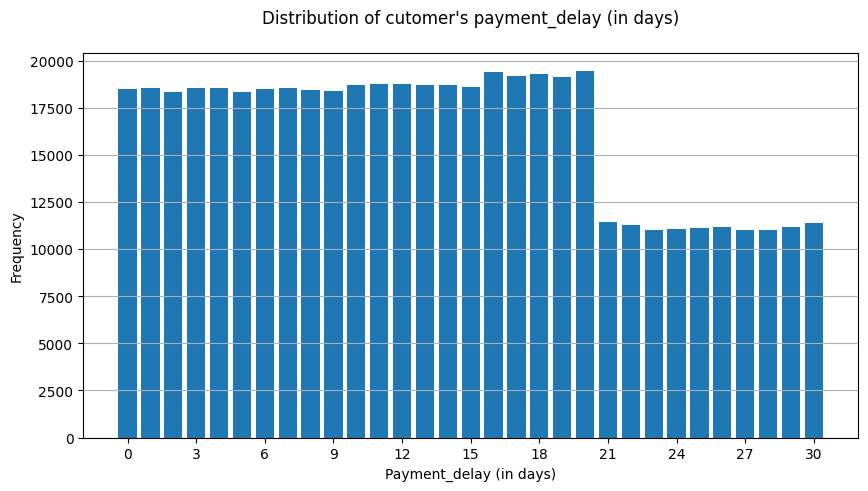

Distribution of cutomer's payment_delay (in days): 13.50 ± 13.00 days
Median: 13.00 days
Minimum: 0 days
Maximum: 30 days

0.200 Skewness



In [29]:
make_barplot(df, 'payment_delay', custom_ticks=np.arange(0, 32, 3), unit='days', additional=' (in days)')

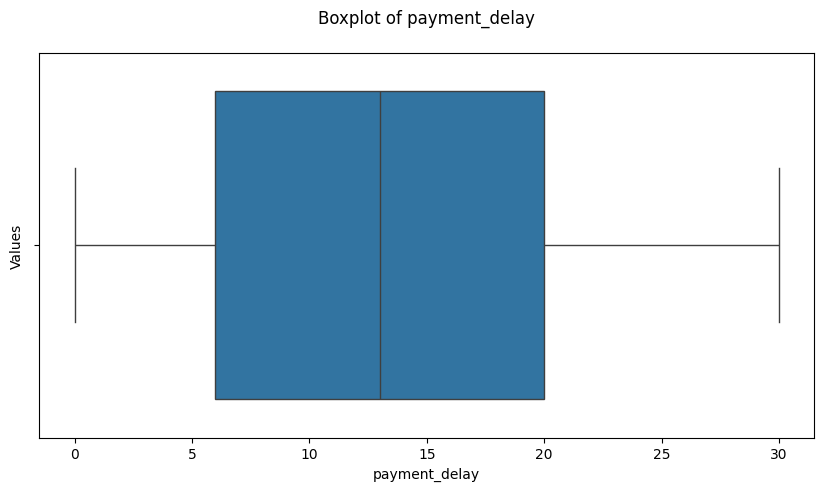

In [30]:
make_boxplot(df, 'payment_delay')

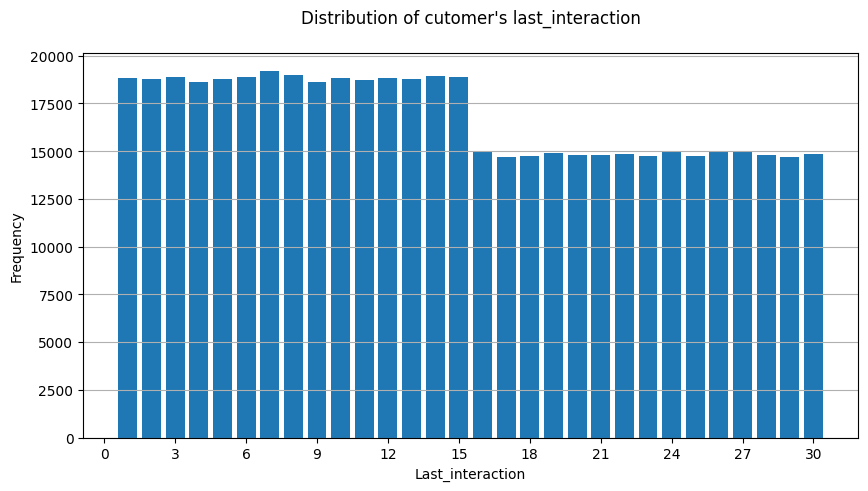

Distribution of cutomer's last_interaction: 14.61 ± 14.00 days
Median: 14.00 days
Minimum: 1 days
Maximum: 30 days

0.155 Skewness



In [31]:
make_barplot(df, 'last_interaction', custom_ticks=np.arange(0, 32, 3), unit='days', additional='')

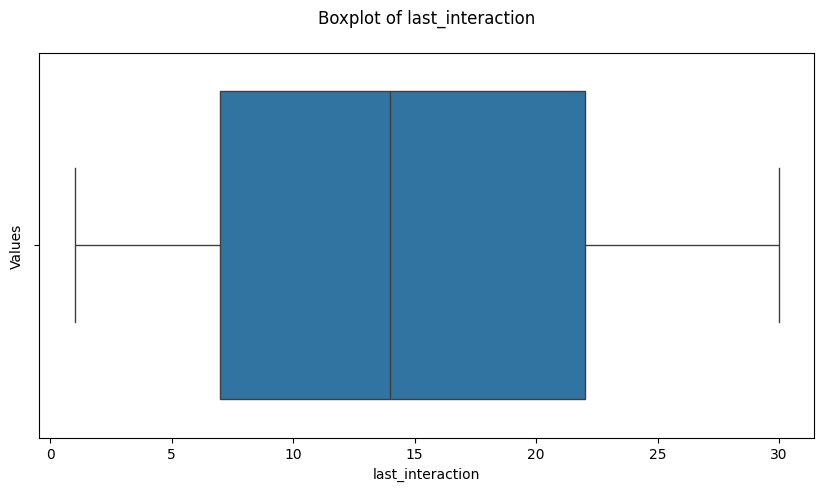

In [32]:
make_boxplot(df, 'last_interaction')

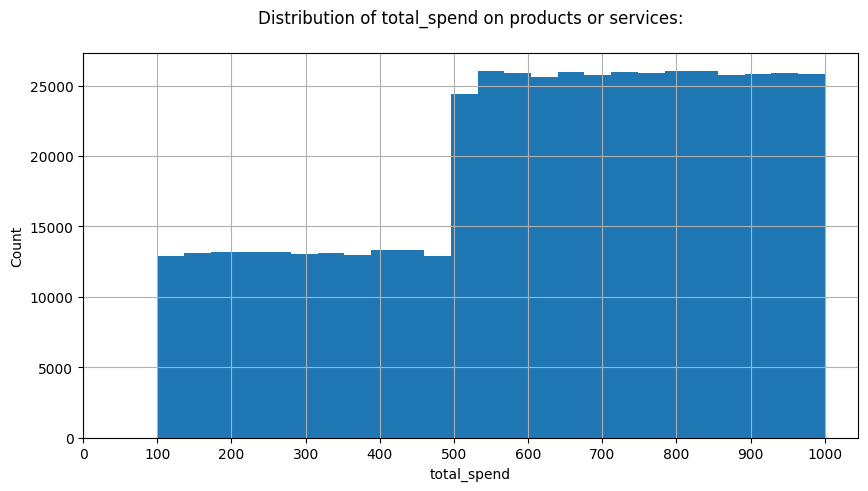

Distribution of total_spend on products or services: 620.07 ± 648.90 USD
Median: 648.90 USD
Minimum: 100.0 USD
Maximum: 1000.0 USD
-0.395 Skewness



In [33]:
make_histogram(df, 'total_spend', bins=25, custom_ticks=np.arange(0, 1001, 100), unit='USD', additional=" on products or services")

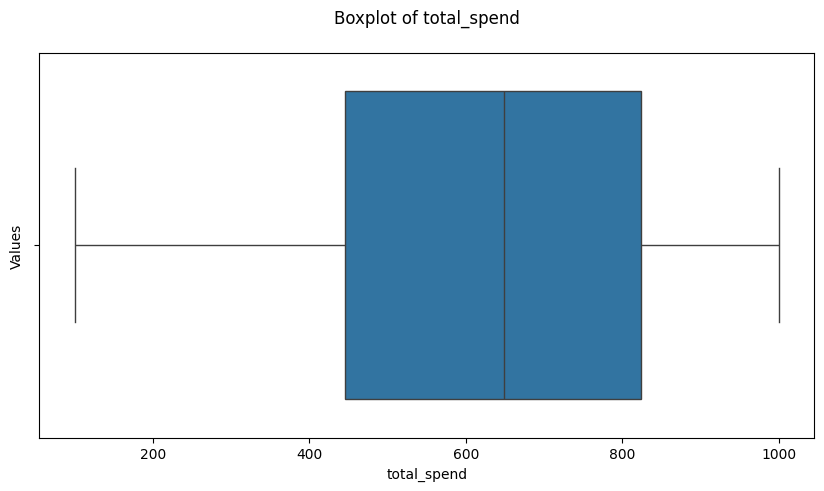

In [34]:
make_boxplot(df, 'total_spend')

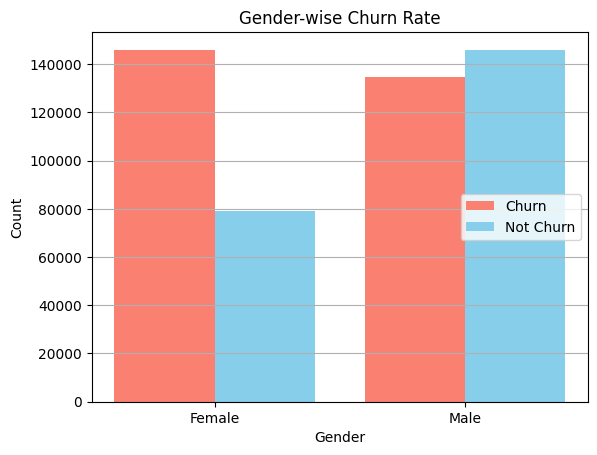

In [35]:
# Assuming the gender_churn DataFrame has been defined earlier
gender_churn = df.groupby(['gender', 'churn']).size().unstack()

X = list(gender_churn.index)
churn_0 = list(gender_churn.iloc[:, 0])
churn_1 = list(gender_churn.iloc[:, 1])

X_axis = np.arange(len(X))

# Set custom colors for the bars
color_churn = 'salmon'  # Color for Churn
color_not_churn = 'skyblue'  # Color for Not Churn

plt.bar(X_axis - 0.2, churn_1, 0.4, label='Churn', color=color_churn)
plt.bar(X_axis + 0.2, churn_0, 0.4, label='Not Churn', color=color_not_churn)

plt.xticks(X_axis, X)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender-wise Churn Rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

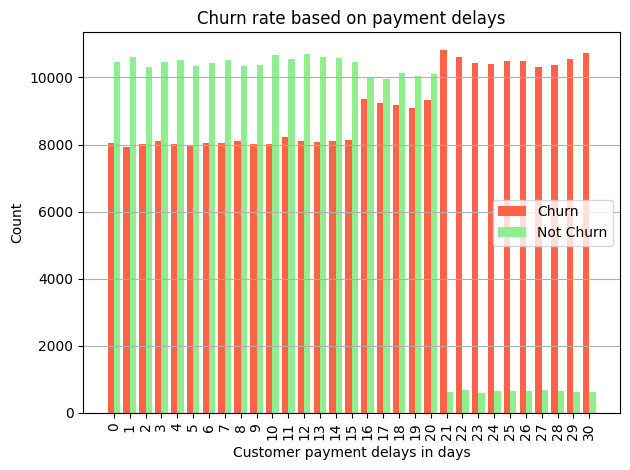

In [36]:
# Assuming the filtered DataFrame has been defined earlier
filtered = df.groupby(['payment_delay', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

# Set custom colors for the bars
color_churn = 'tomato'  # Color for Churn
color_not_churn = 'lightgreen'  # Color for Not Churn

plt.bar(X_axis - 0.2, churn_1, 0.4, label='Churn', color=color_churn)
plt.bar(X_axis + 0.2, churn_0, 0.4, label='Not Churn', color=color_not_churn)

plt.xticks(X_axis, X, rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Customer payment delays in days")
plt.ylabel('Count')
plt.title("Churn rate based on payment delays")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()

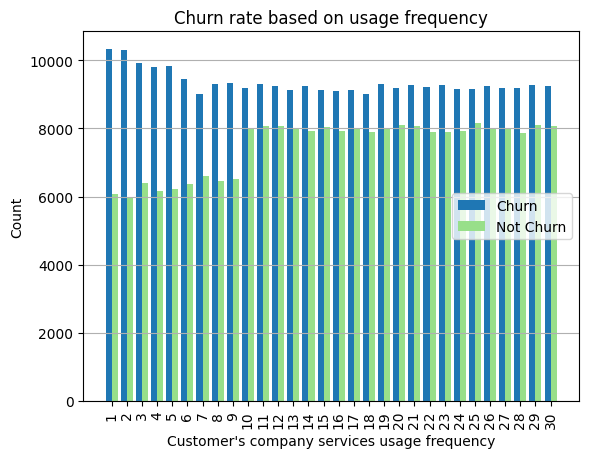

In [37]:
# Assuming `df` and other variables are defined above this snippet
filtered = df.groupby(['usage_frequency', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

# Using dark and light colors
plt.bar(X_axis - 0.2, churn_1, 0.4, label='Churn', color='#1f77b4')    # Dark blue for 'Churn'
plt.bar(X_axis + 0.2, churn_0, 0.4, label='Not Churn', color='#98df8a') # Light green for 'Not Churn'

plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer's company services usage frequency")
plt.ylabel('Count')
plt.title("Churn rate based on usage frequency")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

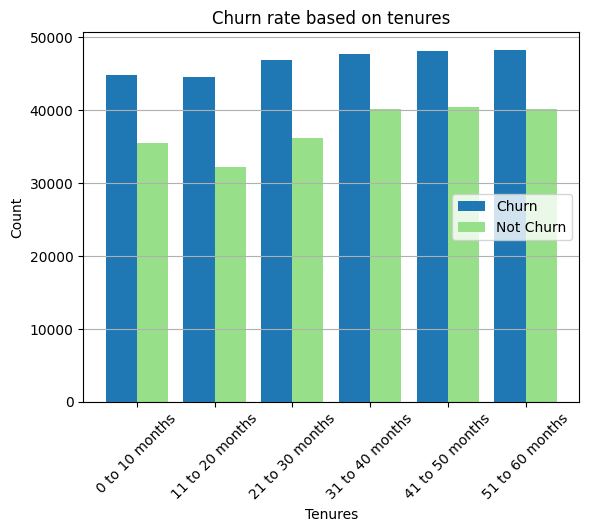

In [38]:
def categorize_age(age):
    if 0 <= age <= 10:
        return '0 to 10 months'
    elif 11 <= age <= 20:
        return '11 to 20 months'
    elif 21 <= age <= 30:
        return '21 to 30 months'
    elif 31 <= age <= 40:
        return '31 to 40 months'
    elif 41 <= age <= 50:
        return '41 to 50 months'
    elif 51 <= age <= 60:
        return '51 to 60 months'
    else:
        return 'Unknown'  # For NaN or out-of-range values

# Assuming `df` contains the 'tenure' and 'churn' columns
filtered = df.copy()
filtered['tenure_segmentation'] = df['tenure'].apply(categorize_age)
filtered = filtered.groupby(['tenure_segmentation', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

# Apply dark and light colors
plt.bar(X_axis - 0.2, churn_1, 0.4, label='Churn', color='#1f77b4')      # Dark blue for 'Churn'
plt.bar(X_axis + 0.2, churn_0, 0.4, label='Not Churn', color='#98df8a')  # Light green for 'Not Churn'

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Tenures')
plt.ylabel('Count')
plt.title("Churn rate based on tenures")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

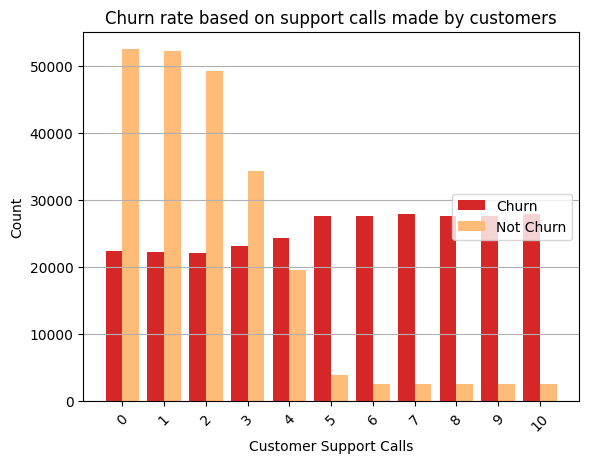

In [39]:
# Assuming `df` contains the 'support_calls' and 'churn' columns
filtered = df.groupby(['support_calls', 'churn']).size().unstack()

# Ensure there are columns for both churn categories (fill with zeros if missing)
filtered = filtered.fillna(0)

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

# Using dark red and light orange colors for better contrast
plt.bar(X_axis - 0.2, churn_1, 0.4, label='Churn', color='#d62728')       # Dark red for 'Churn'
plt.bar(X_axis + 0.2, churn_0, 0.4, label='Not Churn', color='#ffbb78')   # Light orange for 'Not Churn'

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Customer Support Calls')
plt.ylabel('Count')
plt.title("Churn rate based on support calls made by customers")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

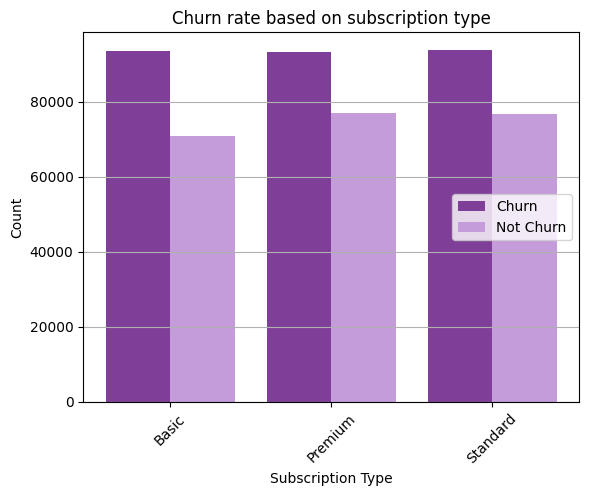

In [40]:
# Assuming `df` contains the 'subscription_type' and 'churn' columns
filtered = df.groupby(['subscription_type', 'churn']).size().unstack()

# Ensure there are columns for both churn categories (fill with zeros if missing)
filtered = filtered.fillna(0)

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

# Using dark purple and light lavender for the bars
plt.bar(X_axis - 0.2, churn_1, 0.4, label='Churn', color='#7f3f98')      # Dark purple for 'Churn'
plt.bar(X_axis + 0.2, churn_0, 0.4, label='Not Churn', color='#c49cda')  # Light lavender for 'Not Churn'

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title("Churn rate based on subscription type")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

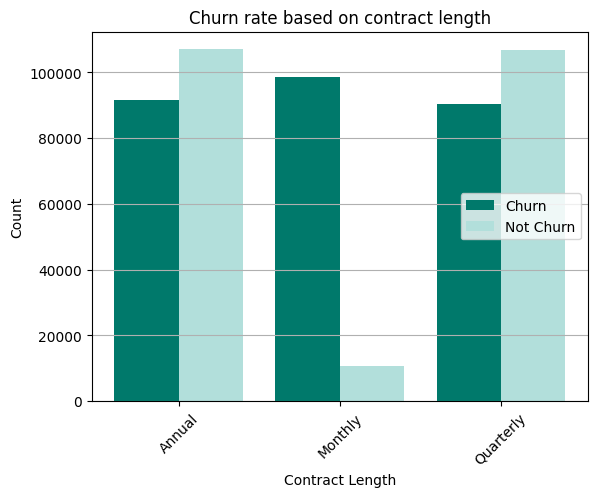

In [41]:
# Assuming `df` contains the 'contract_length' and 'churn' columns
filtered = df.groupby(['contract_length', 'churn']).size().unstack()

# Ensure there are columns for both churn categories (fill with zeros if missing)
filtered = filtered.fillna(0)

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

# Using dark teal and light mint green for the bars
plt.bar(X_axis - 0.2, churn_1, 0.4, label='Churn', color='#00796b')      # Dark teal for 'Churn'
plt.bar(X_axis + 0.2, churn_0, 0.4, label='Not Churn', color='#b2dfdb')  # Light mint green for 'Not Churn'

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.title("Churn rate based on contract length")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

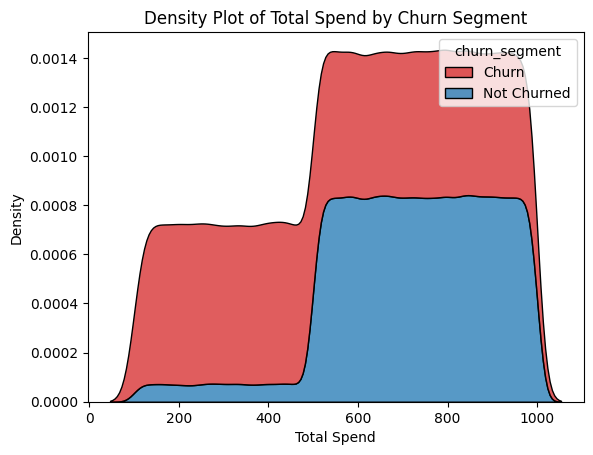

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` contains the 'churn' and 'total_spend' columns
filtered = df.copy()
filtered['churn_segment'] = ['Churn' if x == 1.0 else 'Not Churned' for x in df['churn']]

# Plot with custom colors
sns.kdeplot(data=filtered, x="total_spend", hue="churn_segment", multiple="stack", 
            palette={"Churn": "#d62728", "Not Churned": "#1f77b4"})  # Dark red and light blue

plt.xlabel("Total Spend")
plt.title("Density Plot of Total Spend by Churn Segment")
plt.show()

In [43]:
independent_features_df = df.select_dtypes(include=['number']).copy().drop(columns=['churn'])

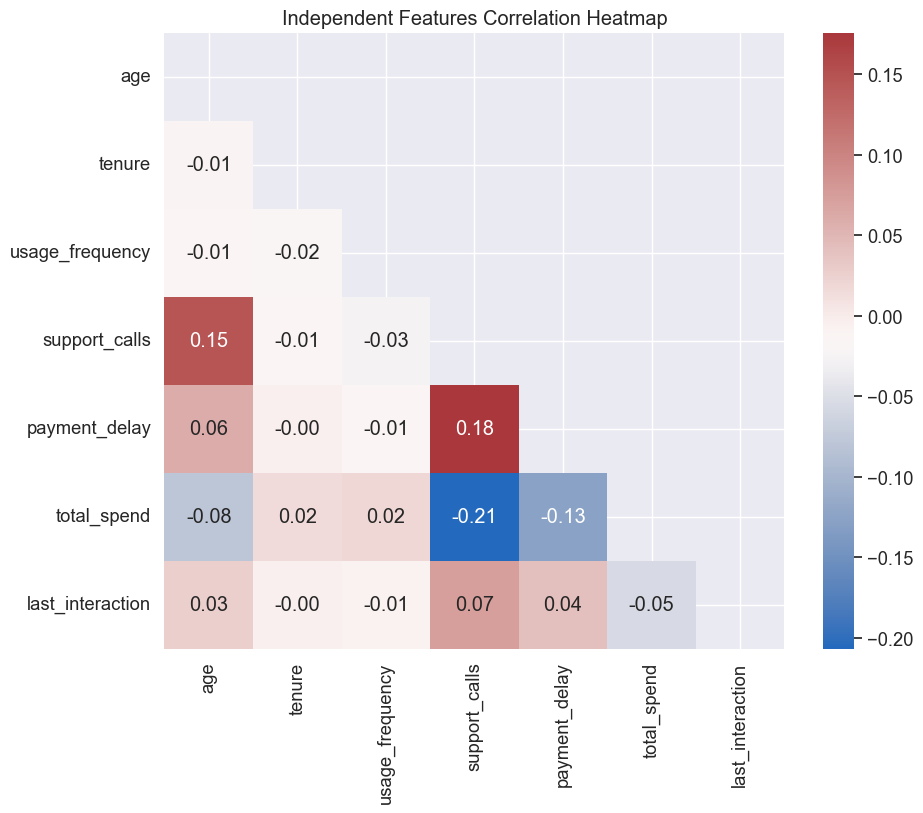

In [44]:
# Assuming `independent_features_df` is defined
corr_matrix = independent_features_df.corr()

# Creating a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

# Plot with custom colormap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="vlag", mask=mask)  # Try "vlag" or "Spectral" for different styles
plt.title("Independent Features Correlation Heatmap")
plt.show()

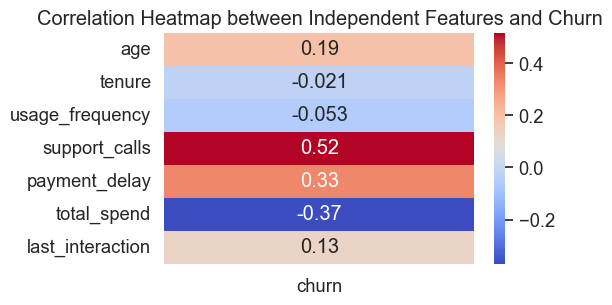

In [45]:
correlation_data = df.select_dtypes(include=['number']).corr().loc[:'last_interaction', 'churn']


# Create a heatmap
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)
sns.heatmap(correlation_data.to_frame(), annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap between Independent Features and Churn")
plt.show()

In [46]:
df[df.duplicated()]

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn


In [47]:
y = df['churn']
X = df.drop(columns='churn')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Reset the index of the resulting DataFrames
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [49]:
X_train

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
0,24,Male,10,6,9,25,Premium,Annual,167.00,12
1,47,Female,1,21,1,2,Premium,Annual,712.28,3
2,27,Female,41,1,0,4,Premium,Annual,618.83,3
3,40,Male,18,8,6,23,Standard,Quarterly,360.00,2
4,40,Male,39,7,3,12,Premium,Monthly,199.00,10
...,...,...,...,...,...,...,...,...,...,...
404159,40,Male,2,7,2,17,Standard,Quarterly,980.37,30
404160,37,Female,41,19,1,5,Premium,Annual,882.00,8
404161,60,Male,38,11,2,19,Basic,Quarterly,142.64,24
404162,39,Male,22,6,4,25,Standard,Monthly,604.00,16


In [50]:
X_test

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
0,49,Male,41,27,5,26,Premium,Monthly,242.00,22
1,38,Female,58,24,6,22,Premium,Quarterly,108.00,11
2,21,Male,36,2,1,7,Basic,Quarterly,535.46,4
3,18,Female,56,4,3,10,Premium,Monthly,635.00,29
4,43,Male,57,29,3,14,Standard,Annual,846.74,19
...,...,...,...,...,...,...,...,...,...,...
101037,53,Female,56,9,5,17,Standard,Monthly,940.23,17
101038,64,Female,12,2,2,7,Standard,Quarterly,876.00,29
101039,22,Female,31,18,2,15,Standard,Quarterly,798.97,3
101040,24,Male,37,14,2,3,Standard,Annual,782.90,18


In [51]:
def validate_test_data_categorical_columns(train_df, test_df):
    # Get the list of categorical columns for both train and test DataFrames
    train_df_categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
    test_df_categorical_columns = test_df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Check if the number of categorical columns is the same in both DataFrames
    if len(set(train_df_categorical_columns).intersection(set(test_df_categorical_columns))) == 0:
        print('Train and test dataframes have different categorical columns')
        return
    else:
        for cat_col in test_df_categorical_columns:
            # Create sets of unique values for the current categorical column in both DataFrames
            train_col = set(x for x in train_df[cat_col].unique().tolist() if not pd.isna(x))
            test_col = set(x for x in test_df[cat_col].unique().tolist() if not pd.isna(x))
            # Check if the sets are not equal, indicating different unique values
            if train_col != test_col:
                print(f'{cat_col} column has different unique values in train and test data:')
                print(f'Unique values in train data: {train_col}')
                print(f'Unique values in test data: {test_col}')
                return
        
        print('All categorical columns have consistent unique values in train and test data.')
        return
    
validate_test_data_categorical_columns(X_train, X_test)

All categorical columns have consistent unique values in train and test data.


In [52]:
def print_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print()
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

    class_report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(class_report)

In [53]:
encoder = OneHotEncoder(sparse_output=False)

encoder.fit(X_train[['gender', 'subscription_type', 'contract_length']])

OneHotEncoder(sparse_output=False)

In [54]:
feature_names = encoder.get_feature_names_out(['gender', 'subscription_type', 'contract_length'])
feature_names

array(['gender_Female', 'gender_Male', 'subscription_type_Basic',
       'subscription_type_Premium', 'subscription_type_Standard',
       'contract_length_Annual', 'contract_length_Monthly',
       'contract_length_Quarterly'], dtype=object)

In [55]:
train_categorical_one_encoded_data = encoder.transform(X_train[['gender', 'subscription_type', 'contract_length']])
train_OHE_df = pd.DataFrame(train_categorical_one_encoded_data, columns=feature_names)

test_categorical_one_encoded_data = encoder.transform(X_test[['gender', 'subscription_type', 'contract_length']])
test_OHE_df = pd.DataFrame(test_categorical_one_encoded_data, columns=feature_names)

In [56]:
train_OHE_df.head(3)

,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [57]:
test_OHE_df.head(3)

,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [58]:
X_train = X_train.drop(columns=['gender', 'subscription_type', 'contract_length'])
X_test = X_test.drop(columns=['gender', 'subscription_type', 'contract_length'])

In [59]:
X_train.head(3)

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction
0,24,10,6,9,25,167.00,12
1,47,1,21,1,2,712.28,3
2,27,41,1,0,4,618.83,3


In [60]:
X_test.head(3)

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction
0,49,41,27,5,26,242.00,22
1,38,58,24,6,22,108.00,11
2,21,36,2,1,7,535.46,4


In [61]:
X_train = pd.concat([X_train, train_OHE_df], axis=1)
X_test = pd.concat([X_test, test_OHE_df], axis=1)

In [62]:
X_train.head(3)

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,24,10,6,9,25,167.00,12,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,47,1,21,1,2,712.28,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,27,41,1,0,4,618.83,3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [63]:
X_test.head(3)

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,49,41,27,5,26,242.00,22,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38,58,24,6,22,108.00,11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,21,36,2,1,7,535.46,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [64]:
# Saving the encoder to a file
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [65]:
def print_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print()
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

    class_report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(class_report)

In [66]:
def k_fold_cross_validation_with_metrics(classifier, X, y, k_folds=5):
    
    # Initializing stratified k-fold cross-validation
    stratified_kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Lists to store the evaluation metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Perform cross-validation
    for train_index, test_index in stratified_kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the classifier on the training data
        classifier.fit(X_train, y_train)
        # Make predictions on the test data
        y_pred = classifier.predict(X_test)

        # Calculate evaluation metrics for this fold
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Append the metrics to their respective lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)

    # Calculate and print the mean of each metric across all folds
    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    print("Mean Metrics Across Folds:")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")
    print(f"Mean Precision: {mean_precision:.2f}")
    print(f"Mean Recall: {mean_recall:.2f}")

# Example usage:
# classifier = YourClassifier()  # Replace with your classifier of choice
# k_fold_cross_validation_with_metrics(classifier, X, y)

In [67]:
model = LogisticRegression()

k_fold_cross_validation_with_metrics(model, X_train, y_train)

C:\Users\sudhe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sudhe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Mean Metrics Across Folds:
Mean Accuracy: 0.84
Mean Precision: 0.87
Mean Recall: 0.85


In [68]:
knn_classifier = KNeighborsClassifier()

k_fold_cross_validation_with_metrics(knn_classifier, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.84
Mean Precision: 0.89
Mean Recall: 0.83


In [69]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

k_fold_cross_validation_with_metrics(decision_tree_classifier, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.88
Mean Precision: 0.90
Mean Recall: 0.88


In [70]:
rf_classifier = RandomForestClassifier(random_state=42)

k_fold_cross_validation_with_metrics(rf_classifier, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.93
Mean Precision: 0.90
Mean Recall: 1.00


In [71]:
xgb_classifier = xgb.XGBClassifier(random_state=42)

k_fold_cross_validation_with_metrics(xgb_classifier, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.93
Mean Precision: 0.90
Mean Recall: 0.99


In [72]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [73]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [75]:
# Testing decision trees

y_pred = decision_tree_classifier.predict(X_test)

print_evaluation_metrics(y_test, y_pred)

Accuracy: 0.88
Precision: 0.90
Recall: 0.89

Confusion Matrix:
[[39520  5273]
 [ 6381 49868]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     44793
           1       0.90      0.89      0.90     56249

    accuracy                           0.88    101042
   macro avg       0.88      0.88      0.88    101042
weighted avg       0.89      0.88      0.88    101042



In [76]:
# Testing random forest

y_pred = random_forest_classifier.predict(X_test)

print_evaluation_metrics(y_test, y_pred)

Accuracy: 0.93
Precision: 0.90
Recall: 1.00

Confusion Matrix:
[[38396  6397]
 [  194 56055]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     44793
           1       0.90      1.00      0.94     56249

    accuracy                           0.93    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



In [77]:
# Testing xgboost

y_pred = xgb_classifier.predict(X_test)

print_evaluation_metrics(y_test, y_pred)

Accuracy: 0.93
Precision: 0.90
Recall: 0.99

Confusion Matrix:
[[38416  6377]
 [  331 55918]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     44793
           1       0.90      0.99      0.94     56249

    accuracy                           0.93    101042
   macro avg       0.94      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042

